<a href="https://colab.research.google.com/github/aayushhiii/Customer_360_Analysis/blob/main/Customer_360.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
customers 360 degree analysis

1) hard data and soft data
focus on soft data for prediction

2) predicting customers behaviour
churn analysis,sentiment, propensity to buy,lifetime value

3) predicting strategies to improve sale
(focusing on purchase history , offering discounts, demonstrating increased dissatisfaction or any negative reviews(causes of churn))

4) Identifying relationship ,connections with company and predicting flags (churn , fraud risk)

5)https://www.kaggle.com/olistbr/brazilian-ecommerce?select=olist_order_reviews_dataset.csv

6) https://github.com/mapr-demos/customer360

7) https://www.kaggle.com/blastchar/telco-customer-churn

8) https://www.kaggle.com/vijayuv/onlineretail ( only tracking essential metrics, customer segmentation, and predicting the lifetime value 
                                                  possible in this dataset)

9) https://blog.hootsuite.com/buyer-persona/ (basic approach to create buyers persona)

10) if we have the transactional records dataset we can break down to clustering customers and then based on transaction
  clusters can be predicted accordingly and recommendations can be provided to win back customers.
  ( https://archive.ics.uci.edu/ml/datasets/online+retail#) can be done on this retail dataset.

11) Customer Segmentation (k-means)
Determine appropriate product pricing.
Develop customized marketing campaigns.
Design an optimal distribution strategy.
Choose specific product features for deployment.
Prioritize new product development efforts.

12) https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python (demographic data)

13) https://www.kaggle.com/carrie1/ecommerce-data ,https://www.kaggle.com/snap/amazon-fine-food-reviews (Combining these two datasets I think 
I can predict the next item that can be recommended to customers and recommend startegies  to run personalized, high-performing campaigns by 
segmenting customers based on their past transactions and history)

14) dataset columns required

    user ID , Product ID , Ratings, invoice date , amount spend by customer, invoice number


'''


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data1.csv to data1 (1).csv


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data1.csv']), header= 0,
                        encoding= 'unicode_escape')


In [ ]:
df['Rating'] = np.random.randint(1, 6, df.shape[0]) 
#disc=['10','15','20','25','30'] #discount column values
#df["Discount"] = np.random.choice(disc, size=len(df))

df["used_discount"]=np.random.randint(0,2,df.shape[0])

#df["used_bogo"]=np.random.randint(0,2,df.shape[0])



In [ ]:
df["used_bogo"]=np.where(df["used_discount"]==1,0,1)
off=['Buy one get one','No offer','10','15','20','25'] #offer column
df["Offer"]=np.random.choice(off,size=len(df))
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,used_discount,used_bogo,Offer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom,4,1,0,15
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,1,0,25
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom,5,1,0,No offer
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,5,0,1,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom,1,1,0,Buy one get one
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12-09-2011 12:50,0.85,12680.0,France,3,0,1,20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12-09-2011 12:50,2.10,12680.0,France,5,1,0,20
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12-09-2011 12:50,4.15,12680.0,France,1,0,1,15
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12-09-2011 12:50,4.15,12680.0,France,4,1,0,15


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df["Day_Name"] = pd.to_datetime(df["InvoiceDate"]).dt.day_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,used_discount,used_bogo,Offer,Day_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,4,1,0,15,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,1,0,25,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,1,0,No offer,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,0,1,20,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,1,0,Buy one get one,Wednesday


In [ ]:
df.dtypes

In [ ]:
df.shape

(541909, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      541909 non-null  object        
 1   StockCode      541909 non-null  object        
 2   Description    540455 non-null  object        
 3   Quantity       541909 non-null  int64         
 4   InvoiceDate    541909 non-null  datetime64[ns]
 5   UnitPrice      541909 non-null  float64       
 6   CustomerID     406829 non-null  float64       
 7   Country        541909 non-null  object        
 8   Rating         541909 non-null  int64         
 9   used_discount  541909 non-null  int64         
 10  used_bogo      541909 non-null  int64         
 11  Offer          541909 non-null  object        
 12  Day_Name       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 53.7+ MB


In [ ]:
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo         0.00
StockCode         0.00
Description       0.27
Quantity          0.00
InvoiceDate       0.00
UnitPrice         0.00
CustomerID       24.93
Country           0.00
Rating            0.00
used_discount     0.00
used_bogo         0.00
Offer             0.00
Day_Name          0.00
dtype: float64

In [ ]:
df.dropna(inplace=True)

In [ ]:
round(100*(df.isnull().sum())/len(df), 2)

InvoiceNo        0.0
StockCode        0.0
Description      0.0
Quantity         0.0
InvoiceDate      0.0
UnitPrice        0.0
CustomerID       0.0
Country          0.0
Rating           0.0
used_discount    0.0
used_bogo        0.0
Offer            0.0
Day_Name         0.0
dtype: float64

In [ ]:
df.shape

(406829, 13)

In [ ]:
df['CustomerID'] = df['CustomerID'].astype('int')
df['Rating'] = df['Rating'].astype('int')
df['Quantity'] = df['Quantity'].astype('int')
df['UnitPrice'] = df['UnitPrice'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  int64         
 7   Country        406829 non-null  object        
 8   Rating         406829 non-null  int64         
 9   used_discount  406829 non-null  int64         
 10  used_bogo      406829 non-null  int64         
 11  Offer          406829 non-null  object        
 12  Day_Name       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 43.5+ MB


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df.shape

(406829, 13)

In [ ]:
count = df.groupby("CustomerID", as_index=False).count()
mean = df.groupby("CustomerID", as_index=False).mean()
count

In [ ]:
df1 = pd.merge(df, count, how='right', on=["CustomerID"])
df1


In [ ]:
df1["Count"] = df1["StockCode_y"]
df1["Rating"] = df1["Rating_x"]
df1["Description"] = df1["Description_x"]


df1 = df1[["CustomerID",'Description','Rating',"Count"]]
df1

In [ ]:
df1 = df1.sort_values('Count', ascending=False)
df2 = df1[df1.Count >= 100]
df2

In [ ]:
df4 = df.groupby("CustomerID", as_index=False).mean()
df4

In [ ]:
combine_summary = df2.groupby("CustomerID")["Description"].apply(list)
combine_summary = pd.DataFrame(combine_summary)
combine_summary.to_csv("combine_summary.csv")
combine_summary

In [ ]:
df3 = pd.read_csv("combine_summary.csv")
df3 = pd.merge(df3, df4, on="CustomerID", how='inner')
df3 = df3[['CustomerID','Description','Rating']]
df3

In [ ]:
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df3["Description_clean"] = df3["Description"].apply(cleanup)
df3

Final Dataset is below

In [ ]:
df3 = df3.drop_duplicates(['Rating'], keep='last')
df3 = df3.reset_index()
df3

In [ ]:
from pandas import DataFrame 
from sklearn.feature_extraction.text import CountVectorizer 
docs = df3["Description_clean"] 
vect = CountVectorizer(max_features = 100, stop_words='english') 
X = vect.fit_transform(docs) 
#print(DataFrame(X.A, columns=vect.get_feature_names()).to_string()) 
df5 = DataFrame(X.A, columns=vect.get_feature_names())
df5 = df5.astype(int)
df5

In [ ]:
df5.to_csv("df5.csv")
kkk=df.sort_values(by='Rating', ascending=False)
kkk  = df.drop_duplicates(['Description'], keep='first')
kkk = kkk.reset_index()
kkk

In [ ]:
X = np.array(df5)
#print(X)

tpercent = 0.95
tsize = int(np.floor(tpercent * len(df5)))
df5_train = X[:tsize]
#print(df5_train)
df5_test = X[tsize:]
print(df5_test)
lentrain = len(df5_train)
lentest = len(df5_test)

#lentrain
#lentest


[[ 1  3  3 ...  0  0  1]
 [ 1  1  1 ...  1 10  0]
 [ 0  0  2 ...  2  4  2]
 ...
 [ 0  0  4 ...  0  0  2]
 [ 0  0  3 ...  3  0  0]
 [ 0  1  0 ... 47  7  1]]


In [ ]:
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(df5_train)


distances, indices = nbrs.kneighbors(df5_train)
nbrs

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [ ]:

for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    #print(a)
    related_product_list = a[1]
    print(related_product_list)


[[  6 478 765]]
[[ 98 827 549]]
[[846  28 325]]
[[345 389 447]]
[[634 136 930]]
[[594 361 406]]
[[731 539 365]]
[[942 316 219]]
[[833 577 821]]
[[345 656 549]]
[[744  54  71]]
[[816 286 101]]
[[643 942 135]]
[[693 712 128]]
[[160 801 105]]
[[883 648 880]]
[[142 218  95]]
[[851 223 787]]
[[187 818 694]]
[[425 850 575]]
[[197  42 646]]
[[256 207 442]]
[[871 115 928]]
[[664 222 593]]
[[863 270 118]]
[[ 91 605 256]]
[[752 274 743]]
[[650 720 715]]
[[ 72  73 556]]
[[257 488 237]]
[[ 37 257 237]]
[[723 699 640]]
[[527 614 606]]
[[197 586 646]]
[[739 718 698]]
[[520 366 656]]
[[219 455 406]]
[[281 440 197]]
[[563 619 555]]
[[308 282 896]]
[[637 266  87]]
[[903  60 143]]
[[356 801 634]]
[[379 267 868]]
[[654 607 285]]
[[452 645 295]]
[[658 173 157]]
[[646 368 176]]
[[449  31 750]]
[[911 548 429]]


In [ ]:
df

In [ ]:
kkk

In [ ]:
kkk
kkk.info()

In [ ]:
a=kkk.loc[kkk['CustomerID'] == 15860]
a
#preprocessing df 

In [ ]:
a=df3["CustomerID"][5]
print(a)

12370


In [ ]:
for i in range(lentest):
    a = nbrs.kneighbors([df5_test[i]])
    related_product_list = a[1]
    
    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    third_related_product = [item[2] for item in related_product_list]
    third_related_product = str(third_related_product).strip('[]')
    third_related_product = int(third_related_product)
    
    print ("Based on  description, for user is ", df3["CustomerID"][lentrain + i])

    for i in range(3896):
      if (kkk["CustomerID"][i] == df3["CustomerID"][first_related_product]):
        print ("The first similar user is ", df3["CustomerID"][first_related_product], ".") 
        print ("He/She likes following products")
        for i in range(3896):
            if (kkk["CustomerID"][i] == df3["CustomerID"][first_related_product]): 
                aaa= kkk["StockCode"][i]
                bbb= kkk["Rating"][i]

                print(aaa ," and it's rating is : ", bbb)
        print ("--------------------------------------------------------------------")
        break
      
        #print("_________")
    for i in range(3896):
      if (kkk["CustomerID"][i] == df3["CustomerID"][second_related_product]):
        print ("The second similar user is ", df3["CustomerID"][second_related_product], ".") 
        print ("He/She likes following products")
        for i in range(3896):
            if (kkk["CustomerID"][i] == df3["CustomerID"][second_related_product]): 
                aaa= kkk["StockCode"][i]
                bbb=kkk["Rating"][i]

                print(aaa ," and it's rating is : ", bbb)
        print ("--------------------------------------------------------------------")
        break

    for i in range(3896):
      if (kkk["CustomerID"][i] == df3["CustomerID"][third_related_product]):
        print ("The third similar user is ", df3["CustomerID"][third_related_product], ".") 
        print ("He/She likes following products")
        for i in range(3896):
            if (kkk["CustomerID"][i] == df3["CustomerID"][third_related_product]): 
                aaa= kkk["StockCode"][i]
                bbb=kkk["Rating"][i]

                print(aaa ," and it's rating is : ", bbb)
        print ("--------------------------------------------------------------------")
        break
      
      

    print ("--------------------------------------------------------------------")

Based on  description, for user is  17961
The second similar user is  15281 .
He/She likes following products
21280  and it's rating is :  5
--------------------------------------------------------------------
The third similar user is  16938 .
He/She likes following products
23338  and it's rating is :  4
23285  and it's rating is :  5
23288  and it's rating is :  4
--------------------------------------------------------------------
--------------------------------------------------------------------
Based on  description, for user is  17964
--------------------------------------------------------------------
Based on  description, for user is  17965
The first similar user is  17419 .
He/She likes following products
21773  and it's rating is :  5
--------------------------------------------------------------------
The third similar user is  14461 .
He/She likes following products
90036F  and it's rating is :  3
90030B  and it's rating is :  3
90131  and it's rating is :  4
84551  and

In [ ]:
user=int(input("enter Customer ID for recommendation : "))
a=df3.loc[df3['CustomerID'] == user]
a
#b=df3[df3['CustomerID']==user].index.values)
#b

enter Customer ID for recommendation : 15005


,index,CustomerID,Description,Rating,Description_clean
429,506,15005,"['PINK CREAM FELT CRAFT TRINKET BOX ', 'LUNCH ...",2.978448,pink cream felt craft trinket box lunch box i ...


In [ ]:
b=df3[df3['CustomerID']==user].index.values
b
b= str(b).strip('[]')
b= int(b)
b

429

In [ ]:
c=df5.loc[[b]]
c

,alarm,antique,assorted,bag,bakelike,bird,birthday,black,blue,bottle,bowl,box,bunting,cake,candles,card,cases,ceramic,charlotte,childrens,christmas,clock,colour,cream,cup,cutlery,decoration,design,doily,dolly,doormat,drawer,egg,fairy,feltcraft,frame,garden,girl,glass,green,...,mini,mug,pack,paisley,pantry,paper,party,pencils,pink,polkadot,red,regency,retrospot,rose,set,sign,silver,skull,small,spaceboy,star,storage,strawberry,suki,tea,tin,tins,travel,union,vintage,wall,warmer,water,white,wicker,wood,wooden,woodland,wrap,zinc
429,0,11,7,365,0,3,0,30,41,8,31,60,26,67,3,45,1,68,111,13,22,0,7,8,14,8,5,193,11,64,11,15,1,27,8,30,2,62,9,3,...,14,25,4,21,19,2,18,11,121,55,68,1,73,11,71,47,4,16,43,52,2,21,47,37,27,3,18,37,9,79,18,4,8,87,18,28,19,25,3,1


In [ ]:
X = np.array(c)
print(X)


[[  0  11   7 365   0   3   0  30  41   8  31  60  26  67   3  45   1  68
  111  13  22   0   7   8  14   8   5 193  11  64  11  15   1  27   8  30
    2  62   9   3   9  47  92  10  28  11  17   2   2   1 142   3   0  15
   24   1  17  30 133  40  14  25   4  21  19   2  18  11 121  55  68   1
   73  11  71  47   4  16  43  52   2  21  47  37  27   3  18  37   9  79
   18   4   8  87  18  28  19  25   3   1]]


In [ ]:
a = nbrs.kneighbors(c)
related_product_list = a[1]
related_product_list

array([[429, 548, 271]])

In [ ]:
first_related_product = [item[0] for item in related_product_list]
first_related_product = str(first_related_product).strip('[]')
first_related_product = int(first_related_product)

print ("Based on  description, for user is ", user)

for i in range(3896):
  if (kkk["CustomerID"][i] == df3["CustomerID"][first_related_product]):
    print ("The first similar user is ", df3["CustomerID"][first_related_product], ".") 
    print ("He/She likes following products")
    for i in range(3896):
        if (kkk["CustomerID"][i] == df3["CustomerID"][first_related_product]): 
            aaa= kkk["StockCode"][i]
            bbb=kkk["Rating"][i]

            print(aaa ," and it's rating is : ", bbb)
    print ("--------------------------------------------------------------------")
    break

Based on  description, for user is  15005
The first similar user is  15005 .
He/She likes following products
84507B  and it's rating is :  5
85023C  and it's rating is :  1
23405  and it's rating is :  2
--------------------------------------------------------------------


In [ ]:
#Final code for personalised recommendation

user=int(input("enter Customer ID for recommendation : "))
a=df3.loc[df3['CustomerID'] == user]
b=df3[df3['CustomerID']==user].index.values
b= str(b).strip('[]')
b= int(b)
c=df5.loc[[b]]

X = np.array(c)

a = nbrs.kneighbors(c)
related_product_list = a[1]

first_related_product = [item[0] for item in related_product_list]
first_related_product = str(first_related_product).strip('[]')
first_related_product = int(first_related_product)
second_related_product = [item[1] for item in related_product_list]
second_related_product = str(second_related_product).strip('[]')
second_related_product = int(second_related_product)
third_related_product = [item[2] for item in related_product_list]
third_related_product = str(third_related_product).strip('[]')
third_related_product = int(third_related_product)

print ("Based on  description, for user is ", user)

for i in range(3896):
  if (kkk["CustomerID"][i] == df3["CustomerID"][first_related_product]):
    print ("The first similar user is ", df3["CustomerID"][first_related_product], ".") 
    print ("He/She likes following products")
    for i in range(3896):
        if (kkk["CustomerID"][i] == df3["CustomerID"][first_related_product]): 
            aaa= kkk["StockCode"][i]
            bbb=kkk["Rating"][i]

            print(aaa ," and it's rating is : ", bbb)
    print ("--------------------------------------------------------------------")
    break

for i in range(3896):
  if (kkk["CustomerID"][i] == df3["CustomerID"][second_related_product]):
    print ("The second similar user is ", df3["CustomerID"][second_related_product], ".") 
    print ("He/She likes following products")
    for i in range(3896):
        if (kkk["CustomerID"][i] == df3["CustomerID"][second_related_product]): 
            aaa= kkk["StockCode"][i]
            bbb=kkk["Rating"][i]

            print(aaa ," and it's rating is : ", bbb)
    print ("--------------------------------------------------------------------")
    break

for i in range(3896):
  if (kkk["CustomerID"][i] == df3["CustomerID"][third_related_product]):
    print ("The third similar user is ", df3["CustomerID"][third_related_product], ".") 
    print ("He/She likes following products")
    for i in range(3896):
        if (kkk["CustomerID"][i] == df3["CustomerID"][third_related_product]): 
            aaa= kkk["StockCode"][i]
            bbb=kkk["Rating"][i]

            print(aaa ," and it's rating is : ", bbb)
    print ("--------------------------------------------------------------------")
    break
      
      

print ("--------------------------------------------------------------------")




enter Customer ID for recommendation : 15005
Based on  description, for user is  15005
The first similar user is  15005 .
He/She likes following products
84507B  and it's rating is :  5
85023C  and it's rating is :  1
23405  and it's rating is :  2
--------------------------------------------------------------------
The third similar user is  14159 .
He/She likes following products
23308  and it's rating is :  2
23273  and it's rating is :  1
23274  and it's rating is :  2
23197  and it's rating is :  2
23196  and it's rating is :  4
81953P  and it's rating is :  5
23379  and it's rating is :  4
23381  and it's rating is :  3
23380  and it's rating is :  3
23402  and it's rating is :  2
23403  and it's rating is :  1
23495  and it's rating is :  3
23496  and it's rating is :  1
--------------------------------------------------------------------
--------------------------------------------------------------------


**RFM Analysis**

In [ ]:
# RFM Analysis

# imported required libraries for clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
df.head()

In [ ]:
df.shape

(406829, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  int64         
 7   Country        406829 non-null  object        
 8   Rating         406829 non-null  int64         
 9   used_discount  406829 non-null  int64         
 10  used_bogo      406829 non-null  int64         
 11  Offer          406829 non-null  object        
 12  Day_Name       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 43.5+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Rating,used_discount,used_bogo
count,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570,2.997893,0.500466,0.499534
std,248.693370,69.315162,1713.600303,1.412745,0.500000,0.500000
min,-80995.000000,0.000000,12346.000000,1.000000,0.000000,0.000000
25%,2.000000,1.250000,13953.000000,2.000000,0.000000,0.000000
50%,5.000000,1.950000,15152.000000,3.000000,1.000000,0.000000
75%,12.000000,3.750000,16791.000000,4.000000,1.000000,1.000000
max,80995.000000,38970.000000,18287.000000,5.000000,1.000000,1.000000


In [ ]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   InvoiceNo      406829 non-null  object        
 1   StockCode      406829 non-null  object        
 2   Description    406829 non-null  object        
 3   Quantity       406829 non-null  int64         
 4   InvoiceDate    406829 non-null  datetime64[ns]
 5   UnitPrice      406829 non-null  float64       
 6   CustomerID     406829 non-null  object        
 7   Country        406829 non-null  object        
 8   Rating         406829 non-null  int64         
 9   used_discount  406829 non-null  int64         
 10  used_bogo      406829 non-null  int64         
 11  Offer          406829 non-null  object        
 12  Day_Name       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 43.5+ MB


In [ ]:
#  Monetary

df['Amount'] = df['Quantity']*df['UnitPrice']
df.head()

In [ ]:
rfm_m = df.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

In [ ]:
#  Frequency
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

In [ ]:
rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

In [ ]:
#  Recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
df.head()

In [ ]:
# we get the latest date
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [ ]:
#diff between latest date and invoice date
df['Diff'] = max_date - df['InvoiceDate']
df.head()

In [ ]:
# last transaction date to get the recency of customers

rfm_p = df.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CustomerID,Diff
0,12346,325 days 02:33:00
1,12347,1 days 20:58:00
2,12348,74 days 23:37:00
3,12349,18 days 02:59:00
4,12350,309 days 20:49:00


In [ ]:
# taking no. of days only
rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CustomerID,Diff
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309


In [ ]:
# final rfm dataset
rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309


Text(0.5, 0, 'Attributes')

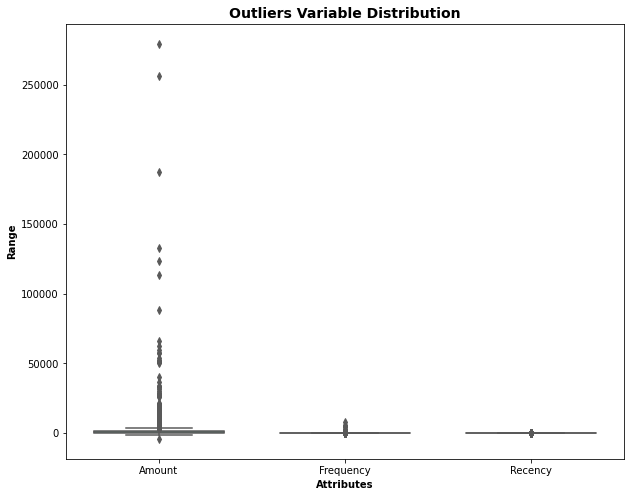

In [ ]:
#outlier

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [ ]:
# Removing outliers for Amount

Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]
rfm

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309
...,...,...,...,...
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,176.60,13,7
4370,18283,2094.88,756,3


In [ ]:
# Removing outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]
rfm

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309
...,...,...,...,...
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,176.60,13,7
4370,18283,2094.88,756,3


In [ ]:
# Removing outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]
rfm

,CustomerID,Amount,Frequency,Recency
0,12346,0.00,2,325
1,12347,4310.00,182,1
2,12348,1797.24,31,74
3,12349,1757.55,73,18
4,12350,334.40,17,309
...,...,...,...,...
4366,18278,173.90,9,73
4367,18280,180.60,10,277
4368,18281,80.82,7,180
4369,18282,176.60,13,7


In [ ]:
# Rescaling 

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4280, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.754208,-0.758814,2.298087
1,1.877245,1.073866,-0.908672
2,0.343089,-0.463549,-0.186161
3,0.318857,-0.035923,-0.740416
4,-0.550042,-0.606090,2.139729


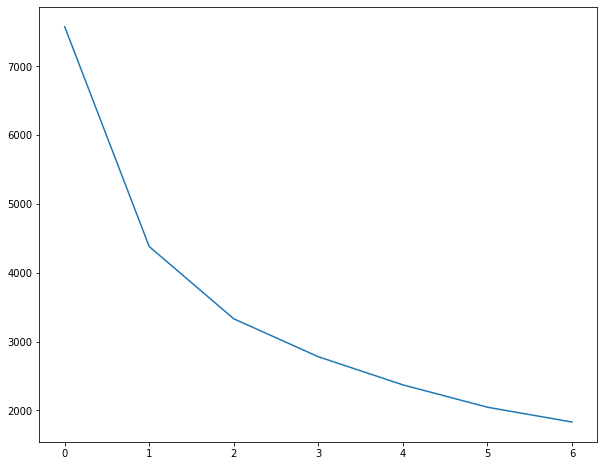

In [ ]:
# k means clustering
# Elbow-curve

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot for each n_clusters
plt.plot(ssd)

In [ ]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
 kmeans.labels_

array([2, 1, 0, ..., 2, 0, 0], dtype=int32)

In [ ]:
rfm['Cluster_Id'] = kmeans.labels_
rfm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346,0.00,2,325,2
1,12347,4310.00,182,1,1
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,2
...,...,...,...,...,...
4366,18278,173.90,9,73,0
4367,18280,180.60,10,277,2
4368,18281,80.82,7,180,2
4369,18282,176.60,13,7,0


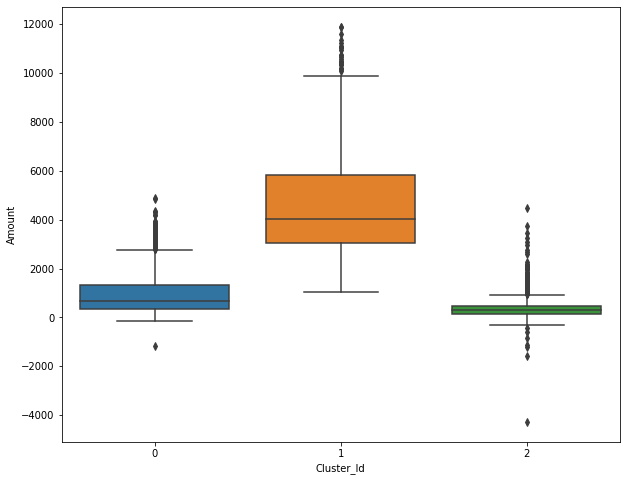

In [ ]:
# Box plot to visualize Cluster Id vs Monetary

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

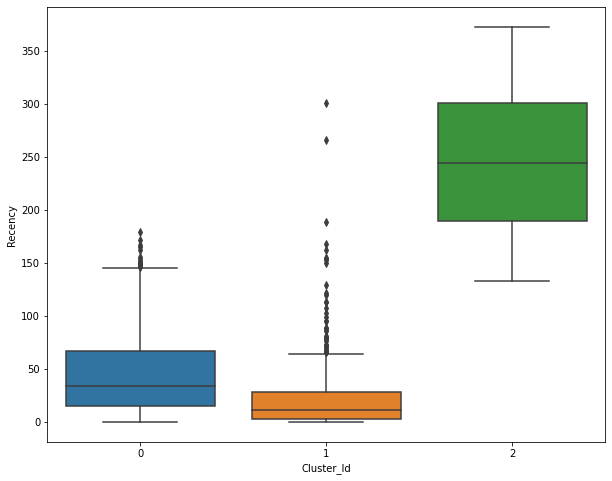

In [ ]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

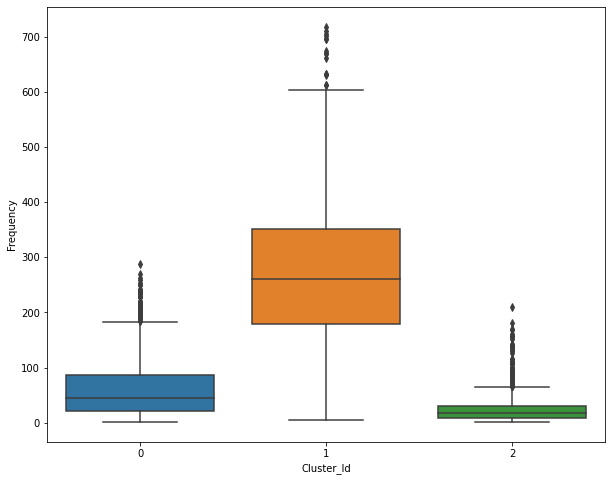

In [ ]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

In [ ]:
#cluster id 1= low monetary , low recency , low frequency
#cluster id 2= large monetary , low recency , large freqency 
#cluster id 3= low monetary , large recency , low frequency 

In [ ]:
rfm

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346,0.00,2,325,2
1,12347,4310.00,182,1,1
2,12348,1797.24,31,74,0
3,12349,1757.55,73,18,0
4,12350,334.40,17,309,2
...,...,...,...,...,...
4366,18278,173.90,9,73,0
4367,18280,180.60,10,277,2
4368,18281,80.82,7,180,2
4369,18282,176.60,13,7,0


In [ ]:
customer=input("enter customer id = ")

enter customer id = 12347


In [ ]:
d=rfm.loc[rfm['CustomerID'] == customer,'Cluster_Id'].iloc[0]
d
if (d==1):
  print("Belongs to cluster ID =",d,"which has low monetary, low recency , low frequency")
elif (d==2):
  print("Belongs to Cluster ID =", d, "which has large monetary, low recency , large frequency")
else:
  print("Belongs to Cluster ID =",d,"which has low monetary, large recency , low frequency")

Belongs to cluster ID = 1 which has low monetary, low recency , low frequency


In [ ]:
df.head()

In [ ]:
df.shape

(406829, 15)

In [ ]:
df.info()

In [ ]:
#OFFER PREDICTION

In [ ]:
nums = {"Offer": {"No offer": 1, "Buy one get one": 2, "10": 3, "15": 4,
                                  "20": 5, "25": 6}}
df['Offer'] = df['Offer'].astype(str)
#'Buy one get one','No offer','10','15','20','25'

In [ ]:
df = df.replace(nums)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,used_discount,used_bogo,Offer,Day_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,0,1,3,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,1,6,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,1,0,3,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5,0,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,1,0,6,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1,0,1,5,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2,0,1,2,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,3,0,1,2,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,4,1,0,6,Friday


In [ ]:
#df6=df
#df6
df6 = df.copy(deep=True)
print(df6)

       InvoiceNo StockCode  ... Offer   Day_Name
0         536365    85123A  ...     3  Wednesday
1         536365     71053  ...     6  Wednesday
2         536365    84406B  ...     3  Wednesday
3         536365    84029G  ...     2  Wednesday
4         536365    84029E  ...     6  Wednesday
...          ...       ...  ...   ...        ...
541904    581587     22613  ...     5     Friday
541905    581587     22899  ...     2     Friday
541906    581587     23254  ...     2     Friday
541907    581587     23255  ...     6     Friday
541908    581587     22138  ...     5     Friday

[406829 rows x 13 columns]


In [ ]:
#df6.info()

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,used_discount,used_bogo,Offer,Day_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,0,1,3,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,1,6,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,1,0,3,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5,0,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,1,0,6,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1,0,1,5,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2,0,1,2,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,3,0,1,2,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,4,1,0,6,Friday


In [ ]:

from sklearn.preprocessing import LabelEncoder
  
le = LabelEncoder()
  
df6["StockCode"]= le.fit_transform(df6['StockCode'])

#df6

#le = preprocessing.LabelEncoder()
#df6 = df[['StockCode']].apply(le.fit_transform)
df6


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,used_discount,used_bogo,Offer,Day_Name
0,536365,3249,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,0,1,3,Wednesday
1,536365,2649,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,1,6,Wednesday
2,536365,2855,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,1,0,3,Wednesday
3,536365,2803,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5,0,1,2,Wednesday
4,536365,2802,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,1,0,6,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,1470,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1,0,1,5,Friday
541905,581587,1746,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2,0,1,2,Friday
541906,581587,2086,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,3,0,1,2,Friday
541907,581587,2087,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,4,1,0,6,Friday


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Rating,used_discount,used_bogo,Offer,Day_Name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,1,0,1,3,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,0,1,6,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2,1,0,3,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,5,0,1,2,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,4,1,0,6,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,1,0,1,5,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2,0,1,2,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,3,0,1,2,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,4,1,0,6,Friday


In [ ]:
x = df6[['StockCode','used_discount', 'used_bogo','UnitPrice']]
#df.head()
y=df6['Offer']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = model.predict(x_test)
predictions

array([3.50700066, 3.51710912, 3.50094294, ..., 3.50213438, 3.51540233,
       3.51957442])

In [ ]:
StockCode=input("enter stock code  ")
price=float(input("enter unit price of item "  ))
used_discount=int(input("enter whether discount used earlier on this item (0 (No) , 1 (Yes) )  "))
used_bogo=int(input("enter whether bogo used earlier on this item (0 (No) , 1 (Yes) ))  "))



enter stock code  84406B
enter unit price of item 1.23
enter whether discount used earlier on this item (0 (No) , 1 (Yes) )  1
enter whether bogo used earlier on this item (0 (No) , 1 (Yes) ))  0


In [ ]:
df

In [ ]:
b=df[df['StockCode']==StockCode].index.values
b
b=b[0]
b
b= str(b).strip('[]')
b= int(b)
b

2

In [ ]:
c=df6[df6.index==b]
#c
#e=c["StockCode"]
#e
#f=str(e).strip('[]')
#e
f=(c['StockCode']).to_string(index=False)
f
b= str(f).strip(' ')
b= int(b)
b

2855

In [ ]:
new_input = np.array([[b,used_discount,used_bogo,price]]) # 2D numpy array

new_output = model.predict(new_input)
v = [round(num) for num in new_output]
print(new_input,v)

[[2.855e+03 1.000e+00 0.000e+00 1.230e+00]] [4]


In [ ]:
# final code for offer

StockCode=input("enter stock code  ")
price=float(input("enter unit price of item "  ))
used_discount=int(input("enter whether discount used earlier on this item (0 (No) , 1 (Yes) )  "))
used_bogo=int(input("enter whether bogo used earlier on this item (0 (No) , 1 (Yes) ))  "))

b=df[df['StockCode']==StockCode].index.values
b=b[0]
b= str(b).strip('[]')
b= int(b)

c=df6[df6.index==b]
f=(c['StockCode']).to_string(index=False)
p= str(f).strip(' ')
p= int(p)

new_input = np.array([[p,used_discount,used_bogo,price]]) # 2D numpy array

new_output = model.predict(new_input)
v = [round(num) for num in new_output]
#print(new_input,v)
v=str(v).strip('[]')
v=int(v)
#v
print("************************************")
if (v==1):
  print("No Offer needed")
elif(v==2):
  print("Provide Buy 1 Get 1")
elif(v==3):
  print("Provide 10% Discount")
elif(v==4):
  print("Provide 15% Discount")
elif(v==5):
  print("Provide 20% Discount")
else:
  print("Provide 25% Discount")
print("************************************")


enter stock code  23225
enter unit price of item 673
enter whether discount used earlier on this item (0 (No) , 1 (Yes) )  0
enter whether bogo used earlier on this item (0 (No) , 1 (Yes) ))  0
************************************
Provide 10% Discount
************************************


In [ ]:
'''
StockCode=input("enter stock code  ")
price=float(input("enter unit price of item "  ))
used_discount=int(
input("enter whether discount used earlier on this item (0 (No) , 1 (Yes) )  "))
used_bogo=int(input("enter whether bogo used earlier on this item (0 (No) , 1 (Yes) ))  "))

new_input = np.array([[StockCode,used_discount,used_bogo,price]]) # 2D numpy array

new_output = model.predict(new_input)
c = [round(num) for num in new_output]
print(new_input,c)
'''

enter unit price of item 41.26
enter whether discount used earlier on this item (0 (No) , 1 (Yes) )  1
enter whether bogo used earlier on this item (0 (No) , 1 (Yes) ))  1
[[ 1.    1.   41.26]] [4]


In [ ]:
# Customer Lifetime Value

In [ ]:
features = ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
data_clv = df[features]
data_clv['TotalSales'] = data_clv['Quantity'].multiply(data_clv['UnitPrice'])
print(data_clv.shape)
data_clv.head()

(406829, 6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalSales
0,17850,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,6,3.39,20.34


In [ ]:
data_clv.describe()

,CustomerID,Quantity,UnitPrice,TotalSales
count,406829.000000,406829.000000,406829.000000,406829.000000
mean,15287.690570,12.061303,3.460471,20.401854
std,1713.600303,248.693370,69.315162,427.591718
min,12346.000000,-80995.000000,0.000000,-168469.600000
25%,13953.000000,2.000000,1.250000,4.200000
50%,15152.000000,5.000000,1.950000,11.100000
75%,16791.000000,12.000000,3.750000,19.500000
max,18287.000000,80995.000000,38970.000000,168469.600000


In [ ]:
data_clv = data_clv[data_clv['TotalSales'] > 0]
data_clv.describe()

,CustomerID,Quantity,UnitPrice,TotalSales
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,15294.423453,12.988238,3.116488,22.397000
std,1713.141560,179.331775,22.097877,309.071041
min,12346.000000,1.000000,0.001000,0.001000
25%,13969.000000,2.000000,1.250000,4.680000
50%,15159.000000,6.000000,1.950000,11.800000
75%,16795.000000,12.000000,3.750000,19.800000
max,18287.000000,80995.000000,8142.750000,168469.600000


In [ ]:
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns=['Count', 'Proportion'], index=data_clv.columns)

,Count,Proportion
CustomerID,0,0.0
InvoiceNo,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
UnitPrice,0,0.0
TotalSales,0,0.0


In [ ]:

# Dropping the null values in the CustomerID variable
data_clv = data_clv[pd.notnull(data_clv['CustomerID'])]
pd.DataFrame(zip(data_clv.isnull().sum(), data_clv.isnull().sum()/len(data_clv)), columns=['Count', 'Proportion'], index=data_clv.columns)

,Count,Proportion
CustomerID,0,0.0
InvoiceNo,0,0.0
InvoiceDate,0,0.0
Quantity,0,0.0
UnitPrice,0,0.0
TotalSales,0,0.0


In [ ]:
maxdate = data_clv['InvoiceDate'].dt.date.max()
mindate = data_clv['InvoiceDate'].dt.date.min()
unique_cust = data_clv['CustomerID'].nunique()
tot_quantity = data_clv['Quantity'].sum()
tot_sales = data_clv['TotalSales'].sum()

print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: {tot_sales}")

The Time range of transactions is: 2010-12-01 to 2011-12-09
Total number of unique customers: 4338
Total Quantity Sold: 5167812
Total Sales for the period: 8911407.904


In [ ]:
Profit_margin = 0.05 
# Transforming the data to customer level for the analysis
customer = data_clv.groupby('CustomerID').agg({'InvoiceDate':lambda x: x.min().month, 
                                                   'InvoiceNo': lambda x: len(x),
                                                  'TotalSales': lambda x: np.sum(x)})

customer.columns = ['Start_Month', 'Frequency', 'TotalSales']
customer.head()

,Start_Month,Frequency,TotalSales
CustomerID,,,
12346,1,1,77183.60
12347,12,182,4310.00
12348,12,31,1797.24
12349,11,73,1757.55
12350,2,17,334.40


In [ ]:
# Calculating CLV for each cohort
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Monthly_CLV = []

for i in range(1, 13):
    customer_m = customer[customer['Start_Month']==i]
    
    Average_sales = round(np.mean(customer_m['TotalSales']),2)
    
    Purchase_freq = round(np.mean(customer_m['Frequency']), 2)
    
    Retention_rate = customer_m[customer_m['Frequency']>1].shape[0]/customer_m.shape[0]
    churn = round(1 - Retention_rate, 2)
    
    CLV = round(((Average_sales * Purchase_freq/churn)) * Profit_margin, 2)
    
    Monthly_CLV.append(CLV)

In [ ]:
monthly_clv = pd.DataFrame(zip(months, Monthly_CLV), columns=['Months', 'CLV'])
display(monthly_clv.style.background_gradient())

,Months,CLV
0,Jan,1546537.090000
1,Feb,313073.920000
2,March,539933.180000
3,Apr,349213.350000
4,May,147597.490000
5,Jun,323795.770000
6,Jul,71760.420000
7,Aug,148834.420000
8,Sep,185155.700000
9,Oct,144042.950000


In [ ]:
#predictive method
!pip install lifetimes
import lifetimes

     |████████████████████████████████| 593kB 10.6MB/s 


In [ ]:
import lifetimes

In [ ]:
'''
features = ['CustomerID', 'InvoiceNo', 'InvoiceDate', 'Quantity', 'UnitPrice']
data_clv = df[features]
data_clv['TotalSales'] = data_clv['Quantity'].multiply(data_clv['UnitPrice'])
print(data_clv.shape)
data_clv.head()
'''

(406829, 6)


,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,TotalSales
0,17850,536365,2010-12-01 08:26:00,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,6,3.39,20.34


In [ ]:
summary = lifetimes.utils.summary_data_from_transaction_data(data_clv, 'CustomerID', 'InvoiceDate', 'TotalSales' )
summary = summary.reset_index()
summary.head()

,CustomerID,frequency,recency,T,monetary_value
0,12346,0.0,0.0,325.0,0.000000
1,12347,6.0,365.0,367.0,599.701667
2,12348,3.0,283.0,358.0,301.480000
3,12349,0.0,0.0,18.0,0.000000
4,12350,0.0,0.0,310.0,0.000000


count    4338.000000
mean        2.864223
std         5.949000
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       131.000000
Name: frequency, dtype: float64
---------------------------------------
Percentage of customers purchase the item only once: 35.68 %


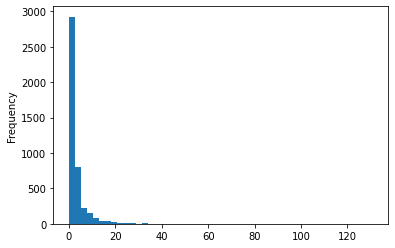

In [ ]:
# Create a distribution of frequency to understand the customer frequence level
summary['frequency'].plot(kind='hist', bins=50)
print(summary['frequency'].describe())
print("---------------------------------------")
one_time_buyers = round(sum(summary['frequency'] == 0)/float(len(summary))*(100),2)
print("Percentage of customers purchase the item only once:", one_time_buyers ,"%")

In [ ]:
# Fitting the BG/NBD model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(summary['frequency'], summary['recency'], summary['T'])

<lifetimes.BetaGeoFitter: fitted with 4338 subjects, a: 0.00, alpha: 68.91, b: 6.75, r: 0.83>

In [ ]:
# Model summary
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826542,0.026785,0.774044,0.879040
alpha,68.905121,2.611786,63.786020,74.024221
a,0.003437,0.010339,-0.016828,0.023702
b,6.745116,22.414725,-37.187745,50.677978


In [ ]:
summary['probability_alive'] = bgf.conditional_probability_alive(summary['frequency'], summary['recency'], summary['T'])
summary.head(10)

,CustomerID,frequency,recency,T,monetary_value,probability_alive
0,12346,0.0,0.0,325.0,0.000000,1.000000
1,12347,6.0,365.0,367.0,599.701667,0.999698
2,12348,3.0,283.0,358.0,301.480000,0.999177
3,12349,0.0,0.0,18.0,0.000000,1.000000
4,12350,0.0,0.0,310.0,0.000000,1.000000
5,12352,6.0,260.0,296.0,368.256667,0.999406
6,12353,0.0,0.0,204.0,0.000000,1.000000
7,12354,0.0,0.0,232.0,0.000000,1.000000
8,12355,0.0,0.0,214.0,0.000000,1.000000
9,12356,2.0,303.0,325.0,269.905000,0.999478


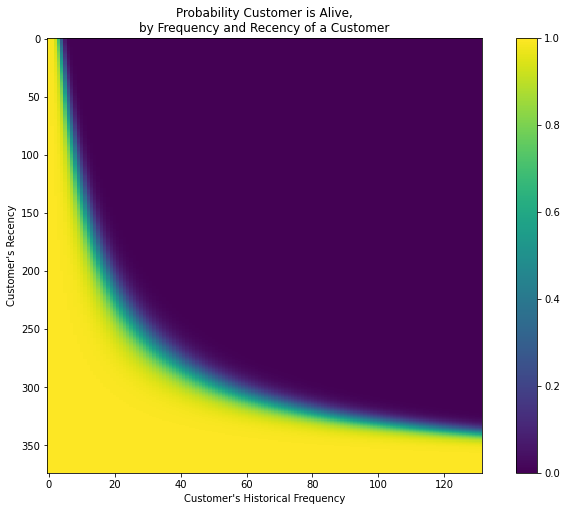

In [ ]:
# Visual representation of relationship between recency and frequency
from lifetimes.plotting import plot_probability_alive_matrix

fig = plt.figure(figsize=(12,8))
plot_probability_alive_matrix(bgf)

In [ ]:
#Predict future transaction for the next 30 days based on historical data
t = 30
summary['pred_num_txn'] = round(bgf.conditional_expected_number_of_purchases_up_to_time(t, summary['frequency'], summary['recency'], summary['T']),2)
summary.sort_values(by='pred_num_txn', ascending=False).head(10).reset_index()

,index,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
0,1879,14911,131.0,372.0,373.0,1093.661679,0.999966,8.95
1,326,12748,112.0,373.0,373.0,301.024821,0.999971,7.66
2,4010,17841,111.0,372.0,373.0,364.452162,0.999962,7.59
3,2176,15311,89.0,373.0,373.0,677.729438,0.999964,6.10
4,1661,14606,88.0,372.0,373.0,135.890114,0.999955,6.03
5,481,12971,70.0,369.0,372.0,159.211286,0.999926,4.82
6,562,13089,65.0,367.0,369.0,893.714308,0.999934,4.51
7,1602,14527,53.0,367.0,369.0,155.016415,0.999925,3.69
8,1069,13798,52.0,371.0,372.0,706.650962,0.999933,3.59
9,2990,16422,47.0,352.0,369.0,702.472340,0.999567,3.27


In [ ]:
# Checking the relationship between frequency and monetary_value
return_customers_summary = summary[summary['frequency']>0]
print(return_customers_summary.shape)
return_customers_summary.head()

(2790, 7)


,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn
1,12347,6.0,365.0,367.0,599.701667,0.999698,0.47
2,12348,3.0,283.0,358.0,301.480000,0.999177,0.27
5,12352,6.0,260.0,296.0,368.256667,0.999406,0.56
9,12356,2.0,303.0,325.0,269.905000,0.999478,0.22
11,12358,1.0,149.0,150.0,683.200000,0.999486,0.25


In [ ]:

# Checking the relationship between frequency and monetary_value
return_customers_summary[['frequency', 'monetary_value']].corr()

,frequency,monetary_value
frequency,1.000000,0.015906
monetary_value,0.015906,1.000000


In [ ]:

# Modeling the monetary value using Gamma-Gamma Model
ggf = lifetimes.GammaGammaFitter(penalizer_coef=0.001)
ggf.fit(return_customers_summary['frequency'],
       return_customers_summary['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 2790 subjects, p: 11.13, q: 0.84, v: 11.29>

In [ ]:
ggf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,11.125568,0.269274,10.597792,11.653344
q,0.838782,0.019731,0.800110,0.877455
v,11.292978,0.281539,10.741162,11.844795


In [ ]:
# Calculating the conditional expected average profit for each customer per transaction
summary = summary[summary['monetary_value'] >0]
summary['exp_avg_sales'] = ggf.conditional_expected_average_profit(summary['frequency'],
                                       summary['monetary_value'])
summary.head()


,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales
1,12347,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040247
2,12348,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725889
5,12352,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034926
9,12356,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562534
11,12358,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704679


In [ ]:
# Checking the expected average value and the actual average value in the data to make sure the values are good
print(f"Expected Average Sales: {summary['exp_avg_sales'].mean()}")
print(f"Actual Average Sales: {summary['monetary_value'].mean()}")

Expected Average Sales: 486.90902215126897
Actual Average Sales: 477.3803385139518


In [ ]:
summary['predicted_clv'] =      ggf.customer_lifetime_value(bgf,
                                                               summary['frequency'],
                                                               summary['recency'],
                                                               summary['T'],
                                                               summary['monetary_value'],
                                                               time=1,     # lifetime in months
                                                               freq='D',   # frequency in which the data is present(T)      
                                                               discount_rate=0.01) # discount rate
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv
1,12347,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040247,280.409518
2,12348,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725889,81.591026
5,12352,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034926,206.034640
9,12356,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562534,59.125290
11,12358,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704679,174.550478


In [ ]:
# CLV in terms of profit (profit margin is 5%)
profit_margin = 0.05
summary['CLV'] = summary['predicted_clv'] * profit_margin
summary.head()

,CustomerID,frequency,recency,T,monetary_value,probability_alive,pred_num_txn,exp_avg_sales,predicted_clv,CLV
1,12347,6.0,365.0,367.0,599.701667,0.999698,0.47,603.040247,280.409518,14.020476
2,12348,3.0,283.0,358.0,301.480000,0.999177,0.27,306.725889,81.591026,4.079551
5,12352,6.0,260.0,296.0,368.256667,0.999406,0.56,371.034926,206.034640,10.301732
9,12356,2.0,303.0,325.0,269.905000,0.999478,0.22,277.562534,59.125290,2.956265
11,12358,1.0,149.0,150.0,683.200000,0.999486,0.25,704.704679,174.550478,8.727524


In [ ]:
summary['CLV'].describe()

count    2790.000000
mean       12.312040
std        49.327361
min         0.136205
25%         2.826065
50%         5.668581
75%        10.967735
max      1692.149403
Name: CLV, dtype: float64